## Geometric Brownian Motion:

$$
\frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t
$$

Generating a value for the percent return of our portfolio between times steps $t+dt$ and $t$.

$\mu$ represents the general trend of our portfolio (gaining or decreasing in value with every time step on average)

$\sigma\sqrt{dt}\xi_t$ is the random movement in a given time step (random walk is here, equal probability of going up or down)

In [1]:
!pip install pandas_datareader

This returns as numpy array

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#default values are set

#you can change the # of years of simulation, # of scenarios, mu, sigma (volatility), steps_per_year, and initial stock price
def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    # start with just the returns, biased by mu_dt plus 1 since we'll need that later
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    prices = s_0*(1+rets).cumprod()
    return prices

this function returns pandas dataframe

In [3]:
%matplotlib inline

def gbm0(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    # converts returns to a DataFrame
    rets = pd.DataFrame(rets)
    # convert to prices
    prices = s_0*(rets+1).cumprod()
    return prices

In [4]:
type(gbm0())

pandas.core.frame.DataFrame

In [5]:
type(gbm())

numpy.ndarray

In [6]:
p = gbm0(n_years=10, n_scenarios=10000, mu=0.07)

In [7]:
p.shape

(120, 10000)

Plotting our GBM function

<Axes: >

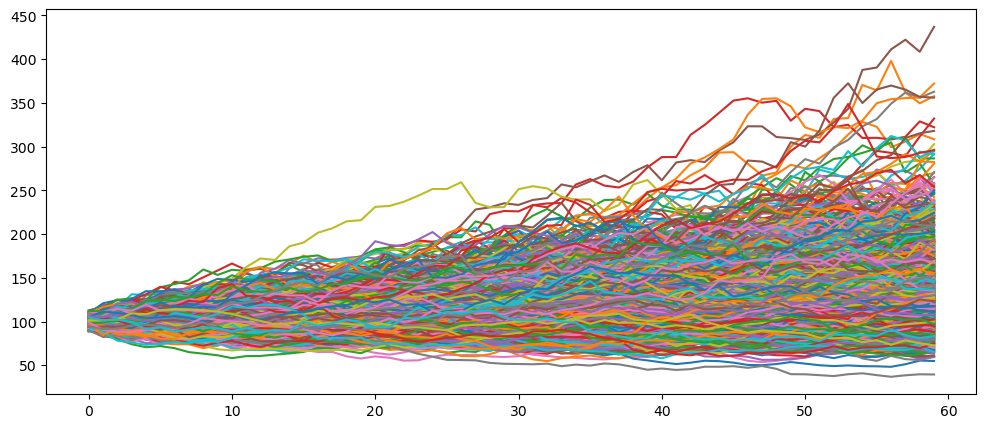

In [8]:
gbm0(n_years=5, n_scenarios=1000, mu=0.07).plot(figsize=(12,5), legend=False)

In [9]:
%timeit gbm0(n_years=5, n_scenarios=1000, mu=0.07)

4.08 ms ± 621 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## CPPI (Constant Proportio Portfolio Insurance) strategy

Dynamic portfolio insurance strategy. Investor's downside risk is limited while retaining some upside potential if market performs well. 

In [10]:
prices =  gbm0(n_scenarios=10, mu=2, sigma=3, s_0=2)
prices

,0,1,2,3,4,5,6,7,8,9
0,1.272504,5.832137e+00,3.594746e+00,2.989554,0.501638,3.705269,5.884285,-9.344571e-01,9.897211e-03,3.545658e+00
1,2.282288,3.449395e+00,3.804012e+00,6.660520,0.899606,2.704757,0.969355,-5.961563e-01,6.702957e-03,-2.691735e+00
2,3.929380,3.917447e+00,1.665001e+00,12.566929,1.292711,3.258501,1.649326,2.664485e-01,1.033708e-02,1.069515e+00
3,-1.827608,4.625971e+00,2.495175e+00,-1.764383,-0.200340,5.673328,2.566178,4.336179e-01,6.971332e-03,-2.402048e-01
4,-4.764940,8.145111e+00,5.025929e+00,-3.126567,-0.182681,2.317868,3.045420,3.575015e-01,-3.818443e-03,-2.810392e-01
...,...,...,...,...,...,...,...,...,...,...
115,-0.006246,1.148503e-12,2.432168e-07,0.000024,-0.000612,0.068637,-80.861807,2.124629e-15,9.987802e-18,3.244893e-12
116,-0.005192,6.514580e-13,1.946958e-07,0.000028,-0.000464,0.068966,-127.427935,-1.251615e-15,3.040599e-18,2.834820e-12
117,-0.004424,1.370014e-12,3.635289e-07,0.000013,-0.000635,0.195734,-48.187439,-4.855330e-16,8.610519e-18,2.672097e-12
118,-0.017829,1.846183e-12,8.390402e-07,0.000025,-0.000885,0.219079,-63.296080,-4.687530e-16,1.479208e-17,7.642291e-12


In [11]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    """
    s_0=100
    prices =  gbm0(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha = 0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=100, ls=":", color="black")
    # draw a dot at the origin
    ax.plot(0,s_0, marker='o',color='darkred', alpha=0.2)
    ax.set_title(f"Geometric Brownian Motion with mu={mu}, sigma={sigma}")
    ax.set_xlabel("Time (in years)")
    ax.set_ylabel("Stock Price")

In [12]:
!pip install ipywidgets

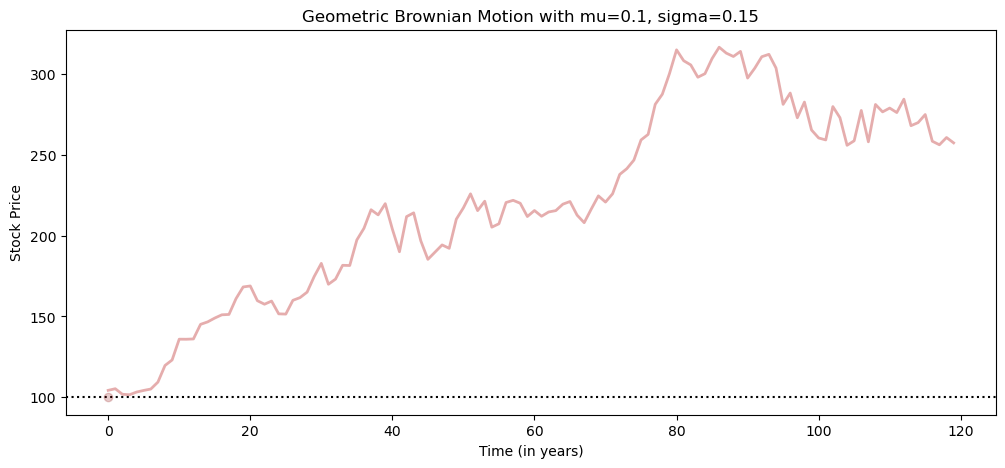

In [13]:
import ipywidgets as widgets
from IPython.display import display
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios=widgets.IntSlider(min=1, max=20, step=1, value=1),
                                   mu=(0., +.2,.01),
                                   sigma=(0, .3, .01)
)

## Monte Carlo Simulations for multiple stocks

C:\Users\kevin\AppData\Local\Temp\ipykernel_15016\3398122001.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers_list, start='2014-01-01', end='2022-01-01', interval = '1d')['Close']
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

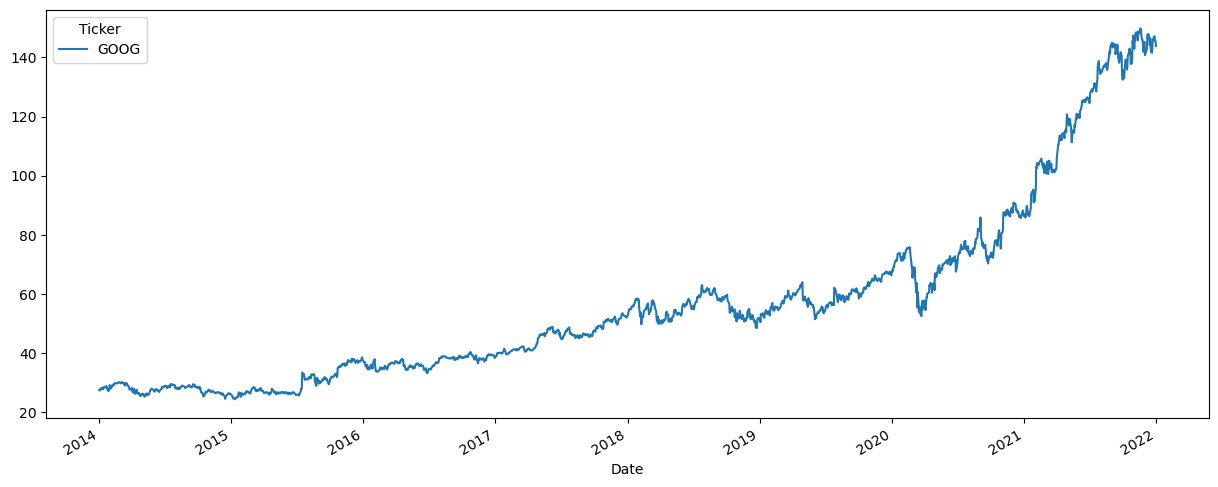

In [14]:
import yfinance as yf
tickers_list = ['GOOG']
data = yf.download(tickers_list, start='2014-01-01', end='2022-01-01', interval = '1d')['Close']

data.plot(figsize=(15,6))

Import stock data with pandas_datareader

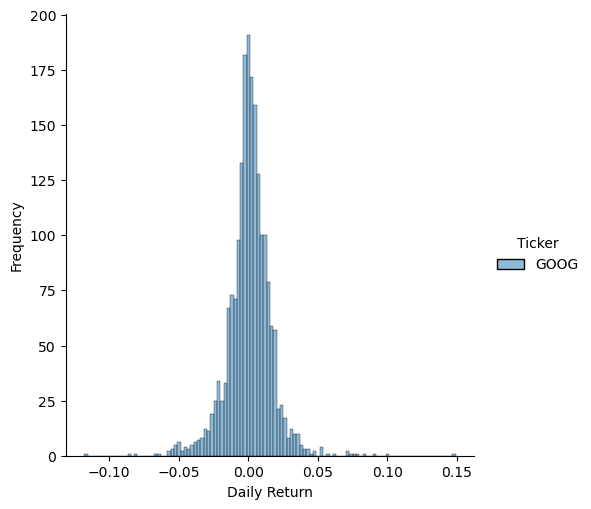

In [15]:
log_returns = np.log(1 + data.pct_change())
#Plot
sns.displot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

The reason why it's centered around zero is because we are taking the log of the percent change + 1. Since percent change is very close to 0, we are essentially taking the log(1), which is 0.

Computing drift for our returns & variance & mean of daily returns

In [ ]:
#find the mean of the returns
u = log_returns.mean().iloc[0]
#find variance of the returns
var = log_returns.var().iloc[0]

#finding the drift
drift = u - (0.5*var)

#finding the standard deviation
stdev = log_returns.std().iloc[0]


days = 50
trials = 100
# Generate random numbers from a standard normal distribution (mean 0, std 1)
Z = norm.ppf(np.random.rand(days, trials)) #generates a days x trials matrix of standard normal variables, simulating random stocks

#we are using the standard normal distribution and then scaling/shifting to apply to more complex distributions

# Generate daily returns using the GBM formula: the drift + standard deviation * Z, which Z are the random shocks/simulations
#essentially, the drift is the shift.

#.exp is to get the daily returns back to the original scale (thanks to vector operations)
daily_returns = np.exp(drift + stdev * Z)

In [22]:
daily_returns

array([[1.00503392, 1.00340074, 1.00835447, ..., 1.03164662, 0.97529574,
        1.01740542],
       [1.01973546, 1.00712061, 0.98771516, ..., 0.99116186, 1.00747326,
        1.02746256],
       [1.01509018, 1.00856144, 0.97928401, ..., 0.98288521, 0.99512484,
        1.02152982],
       ...,
       [0.98839879, 1.01305966, 0.98705825, ..., 1.02374387, 0.98726068,
        1.02338215],
       [1.00917055, 1.03546658, 1.01165118, ..., 0.98428166, 1.01580091,
        0.99066955],
       [1.02469043, 1.00494796, 1.02818389, ..., 1.02526015, 1.00282141,
        0.98863332]], shape=(50, 100))

Explanation: Look back on recording for Desmos/Geometric explanation

In [ ]:
price_paths = np.zeros_like(daily_returns)

#simulation starts with last price in the data
price_paths[0] = data.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

Column = Trial <br>
Row = Day

In [20]:
price_paths.shape

(50, 100)

<Axes: >

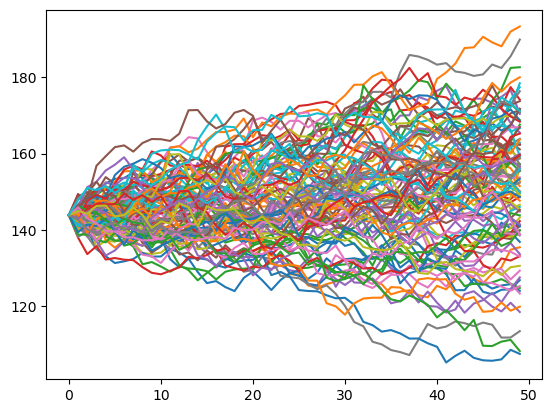

In [21]:
pd.DataFrame(price_paths).plot(legend=None)

# EXERCISES

In [29]:
import yfinance as yf
tickers_list = ['TSLA']
data = yf.download(tickers_list, start='2015-01-01', end='2022-01-01', interval = '1d')

data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))

data = data[["Log Return", "Close"]]

C:\Users\kevin\AppData\Local\Temp\ipykernel_15016\769943168.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers_list, start='2015-01-01', end='2022-01-01', interval = '1d')
[*********************100%***********************]  1 of 1 completed


In [30]:
data

Price,Log Return,Close
Ticker,,TSLA
Date,,
2015-01-02,NaN,14.620667
2015-01-05,-0.042950,14.006000
2015-01-06,0.005648,14.085333
2015-01-07,-0.001563,14.063333
2015-01-08,-0.001566,14.041333
...,...,...
2021-12-27,0.024935,364.646667
2021-12-28,-0.005013,362.823334
